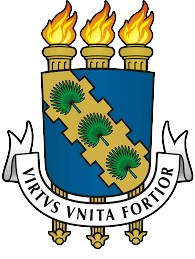
# Universidade Federal do Ceará  
## Departamento de Computação  

---

### Disciplina: **Métodos Numéricos**  
**Professor:** João Paulo do Vale Madeiro  

---

### **Aluno:** Lucas de Oliveira Sobral  
**Matrícula:** 556944  
**Curso:** Engenharia de Computação  


# Aula Prática 01 – Estudo de Erros


## Questão 1
Considere o seguinte processo iterativo:

\[
$x^{(1)}$ = $\frac{1}{3}$
\]

\[
$x^{(n+1)} = 4x^{(n)} - 1, \quad \text{para } n = 1, 2, \dots$
\]

Obsere que:

\[
$x^{(1)} = \frac{1}{3}, \quad x^{(2)} = 4 \cdot \frac{1}{3} - 1 = \frac{1}{3}, \quad x^{(3)} = \frac{1}{3}, \dots$
\]

Ou seja, temos uma sequência é constante e igual a $\frac{1}{3}$. No entanto, ao calcularmos no computador, usando o sistema de
numeração double, a sequência obtida não é constante e, de fato, diverge. Faça o teste em Python, colocando $ x = \frac{1}{3}$ e itere algumas vezes a linha de comando >>> $ x = 4*x-1$

Justifique com base no conteúdo das aulas teóricas


In [9]:
import numpy as np
import matplotlib.pyplot as plt

x = []
x.append(1/3)
print (x)
for i in range(0,10):
  termo = x[i]*4-1

  x.append(termo)
  print (x)

[0.3333333333333333]
[0.3333333333333333, 0.33333333333333326]
[0.3333333333333333, 0.33333333333333326, 0.33333333333333304]
[0.3333333333333333, 0.33333333333333326, 0.33333333333333304, 0.33333333333333215]
[0.3333333333333333, 0.33333333333333326, 0.33333333333333304, 0.33333333333333215, 0.3333333333333286]
[0.3333333333333333, 0.33333333333333326, 0.33333333333333304, 0.33333333333333215, 0.3333333333333286, 0.3333333333333144]
[0.3333333333333333, 0.33333333333333326, 0.33333333333333304, 0.33333333333333215, 0.3333333333333286, 0.3333333333333144, 0.33333333333325754]
[0.3333333333333333, 0.33333333333333326, 0.33333333333333304, 0.33333333333333215, 0.3333333333333286, 0.3333333333333144, 0.33333333333325754, 0.33333333333303017]
[0.3333333333333333, 0.33333333333333326, 0.33333333333333304, 0.33333333333333215, 0.3333333333333286, 0.3333333333333144, 0.33333333333325754, 0.33333333333303017, 0.3333333333321207]
[0.3333333333333333, 0.33333333333333326, 0.33333333333333304, 0.

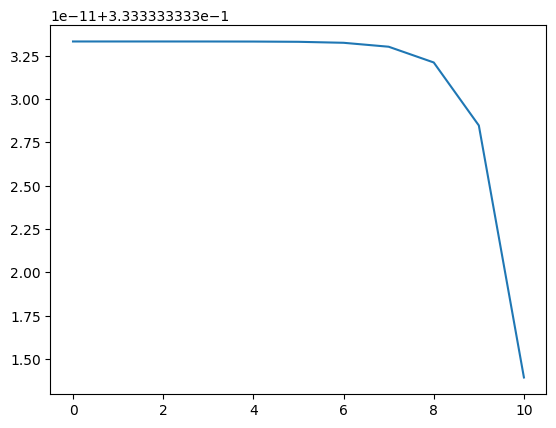

In [4]:
plt.plot(x, label='analise de x')

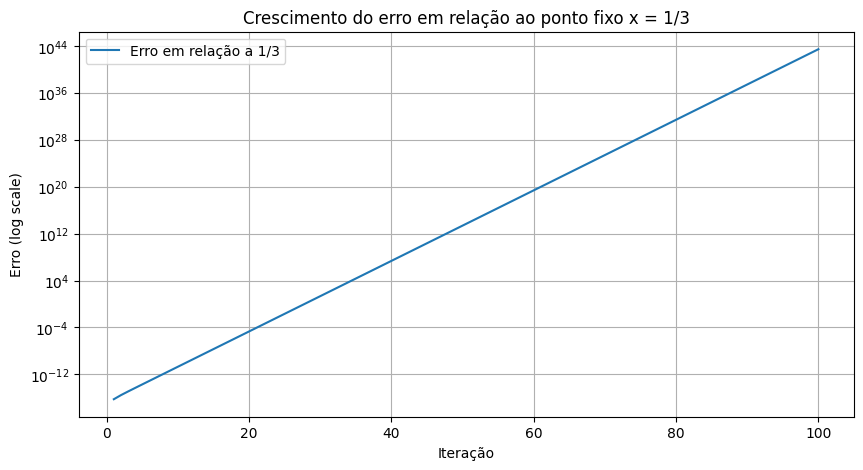

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = []
x.append(1/3)
erro = []

for i in range(0,100):
    termo = x[i]*4 - 1
    x.append(termo)
    erro.append(abs(x[i+1] - 1/3))  # Erro em relação ao ponto fixo 1/3

# Gerar gráfico do erro
plt.figure(figsize=(10, 5))
plt.plot(range(1, 101), erro, label='Erro em relação a 1/3')
plt.yscale('log')  # Escala log para ver melhor o crescimento
plt.xlabel('Iteração')
plt.ylabel('Erro (log scale)')
plt.title('Crescimento do erro em relação ao ponto fixo x = 1/3')
plt.grid(True)
plt.legend()
plt.show()


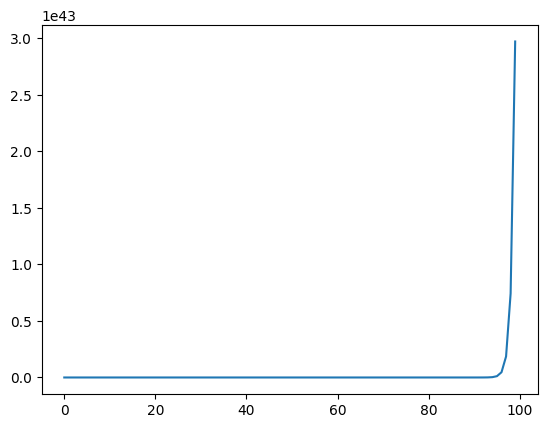

In [11]:
plt.plot(erro, label='analise do erro')

Resposta: Com base nos gráficos apresentados e calculando o erro, podemos constatar que mesmo que o cálculo seja constante o acumulo de erros relativos à soma e a multiplicação acabam por deixar o resultado final mais errôneo.

Calculo dos erros que se acumulam:

(separando $x*4-1$ em $u = x*4$ , $v = u-1$)

$ERu = ERx + ER4 + ERop = ERx + ERop$

$ERv = ERu (\frac{\bar{x}} {\bar{x}-1}) - ER1(\frac{\bar{1}} {\bar{x}-1})  + ERop = ERu(\frac{\bar{x}} {\bar{x}-1}) + ERop  $

Pontando o erro a cada interação será Erro Relativo de V, pois V tem a multiplicação e a subtração incluso:

$ERv = (ERx + ERop)(\frac{\bar{x}} {\bar{x}-1}) + ERop$


## Questão 2

A corrente $I$ em ampères e a tensão $V$ em volts em uma lâmpada se relacionam conforme a seguinte expressão:

\[
$I = \left( \frac{V}{V_0} \right)^{\alpha}$
\]

em que $\alpha$ é um número entre 0 e 1, e $V_0$ é a tensão nominal em volts.

Sabendo que $V_0 = 220 \pm 3\%$ e $\alpha = -0{,}8 \pm 4\%$, calcule a corrente e o erro relativo associado quando a tensão vale $220 \pm 1\%$.

---

**OBS:** Este problema pode ser resolvido de duas formas distintas:

- Usando a **expressão aproximada para a propagação do erro**.
- Inspecionando os **valores máximos e mínimos** que a expressão pode assumir.

> Pratique os dois métodos.  
> **Dica:** lembre que \$( x^\alpha = e^{\alpha \cdot \ln(x)}$ \)


In [13]:
#expressão aproximada para a propagação do erro.

V0 = 220
delta_V0_r = 3
delta_V0_ab = (delta_V0_r/100) * V0

alfa = -0.8
delta_alfa_r = 4
delta_alfa_ab = np.abs((delta_alfa_r/100) * alfa)

V = 220
delta_V_r = 1
delta_V_ab = (delta_V_r/100)*V

dpIdv = np.abs((V)**(alfa-1)*(alfa/(V0**alfa)))
dpIdV0 = np.abs((-alfa)*(V**alfa)*(V0**(-alfa-1)))
dpIalfa = np.abs(((V/V0)**alfa)*np.log(V/V0))

delta_I = dpIdv*delta_V_ab + dpIdV0*delta_V0_ab + dpIalfa*delta_alfa_ab
print('valor absoluto do erro: ')
print(delta_I)

I = (V/V0)**alfa
print('Valor nominal da corrente: ')
print(I)

print('Valor mínimo com erro: ')
print(I - delta_I)

print('Valor máximo com erro: ')
print(I + delta_I)

delta_I_r = np.abs((delta_I/I)*100)
print('Valor relativo do erro(%): ')
print(delta_I_r)

print('Valor ')

valor absoluto do erro: 
0.032
Valor nominal da corrente: 
1.0
Valor mínimo com erro: 
0.968
Valor máximo com erro: 
1.032
Valor relativo do erro(%): 
3.2
Valor 


In [14]:
#Inspecionando os valores máximos e mínimos que a expressão pode assumir.

def calcular_corrente(V, V0, a):
    return (V/V0)**a

# Variações percentuais
delta_V = 0.01  # ±1%
delta_V0 = 0.03  # ±3%
delta_a = 0.04   # ±4%

# Criar todas as combinações possíveis de valores extremos
combinations = [
    (V*(1 + delta_V), V0*(1 + delta_V0), alfa*(1 + delta_a)),
    (V*(1 + delta_V), V0*(1 + delta_V0), alfa*(1 - delta_a)),
    (V*(1 + delta_V), V0*(1 - delta_V0), alfa*(1 + delta_a)),
    (V*(1 + delta_V), V0*(1 - delta_V0), alfa*(1 - delta_a)),
    (V*(1 - delta_V), V0*(1 + delta_V0), alfa*(1 + delta_a)),
    (V*(1 - delta_V), V0*(1 + delta_V0), alfa*(1 - delta_a)),
    (V*(1 - delta_V), V0*(1 - delta_V0), alfa*(1 + delta_a)),
    (V*(1 - delta_V), V0*(1 - delta_V0), alfa*(1 - delta_a))
]

# Calcular todas as correntes possíveis
correntes = [calcular_corrente(V, V0, a) for V, V0, a in combinations]

# Encontrar os valores máximo e mínimo
I_max = max(correntes)
I_min = min(correntes)

# Calcular o valor nominal da corrente
I_nominal = calcular_corrente(V, V0, alfa)

# Calcular o erro relativo
erro_relativo = (I_max - I_min) / (2 * I_nominal)

print(f"Valor nominal da corrente: {I_nominal:.6f}")
print(f"Valor máximo com erro: {I_max:.6f}")
print(f"Valor mínimo com erro: {I_min:.6f}")
print(f"Valor relativo do erro: {erro_relativo*100:.2f}%")

Valor nominal da corrente: 1.000000
Valor máximo com erro: 1.033504
Valor mínimo com erro: 0.966938
Valor relativo do erro: 3.33%


Resposta: Podemos observar que as duas maneiras resultaram em resultados iguais.

## Questão 3

Considere as expressões:

\[
$f_1(\mu) = \frac{\exp\left(\frac{1}{\mu}\right)}{1 + \exp\left(\frac{1}{\mu}\right)}$
\]

e

\[
$f_2(\mu) = \frac{1}{\exp\left(-\frac{1}{\mu}\right) + 1}$
\]

com $\mu > 0$.

---

### Objetivo:

Verifique que elas são **idênticas como funções reais**. Teste no computador cada uma delas para:

- $\mu = 0{,}1$
- $\mu = 0{,}01$
- $\mu = 0{,}001$

---

### Questão:

Qual dessas expressões é mais adequada quando $\mu$ é um número pequeno?  
**Por quê?**  
(Dica: pense em estabilidade numérica e estouros de valor.)



In [20]:
import math

mus = [0.1, 0.01, 0.001]
valores_F1 = []
valores_F2 = []

for mu in mus:
    f1 = (np.exp(1/mu)) / (1 + np.exp(1/mu))
    valores_F1.append(f1)
    f2 = 1 / (math.exp(-1/mu) + 1)
    valores_F2.append(f2)


print("Valores da primeira expressão:")
print(valores_F1)

print("Valores da segunda expressão:")
print(valores_F2)


Valores da primeira expressão:
[np.float64(0.9999546021312976), np.float64(1.0), np.float64(nan)]
Valores da segunda expressão:
[0.9999546021312976, 1.0, 1.0]


<ipython-input-20-08460fca54af>:8: RuntimeWarning: overflow encountered in exp
  f1 = (np.exp(1/mu)) / (1 + np.exp(1/mu))
<ipython-input-20-08460fca54af>:8: RuntimeWarning: invalid value encountered in scalar divide
  f1 = (np.exp(1/mu)) / (1 + np.exp(1/mu))


Resposta: As funções $( f_1(\mu) = \frac{e^{1/\mu}}{1 + e^{1/\mu}} )$ e $( f_2(\mu) = \frac{1}{e^{-1/\mu} + 1} )$ são matematicamente idênticas. No entanto, para valores pequenos de $( \mu ), ( f_2 )$ é mais adequada numericamente, pois evita o estouro causado por $( e^{1/\mu} )$ em $( f_1 )$. Enquanto $( e^{-1/\mu} )$ tende a zero de forma segura, $( e^{1/\mu} )$ cresce rapidamente e pode causar overflow, tornando $( f_1 $) instável em computadores.


## Questão 4

Encontre **expressões alternativas** para calcular o valor das seguintes funções quando $x$ é **próximo de zero**:

---

**a)**  
\[
$f(x) = \frac{1 - \cos(x)}{x^2}$
\]

---

**b)**  
\[
$g(x) = \sqrt{1 + x} - 1$
\]

---

**c)**  
\[
$h(x) = \sqrt{x + 10^6} - 10^3$
\]

---

**d)**  
\[
$i(x) = \sqrt{1 + e^x} - \sqrt{2}$
\]
**Dica:** Faça \( y = e^x - 1 \)


In [21]:
#a)

val_x = 0.0001

def f_x(x):
  return (1 - np.cos(x)) / (x**2)

def f_alt(x):
  return (1/2) - ((x**2) / 24) + ((x**4) / 720)

fx = f_x(val_x)
fx_alt = f_alt(val_x)

print("Valor utilizando a expressão original:")
print(fx)

print("Valor utilizando a expressão alternativa:")
print(fx_alt)


Valor utilizando a expressão original:
0.4999999969612645
Valor utilizando a expressão alternativa:
0.49999999958333335


In [22]:
#b)

def g_x(x):
  return np.sqrt(1 + x) - 1

def g_alt(x):
  return (x / (np.sqrt(1 + x) + 1))

gx = g_x(val_x)
gx_alt = g_alt(val_x)

print("Valor utilizando a expressão original:")
print(gx)

print("Valor utilizando a expressão alternativa:")
print(gx_alt)

Valor utilizando a expressão original:
4.9998750062396624e-05
Valor utilizando a expressão alternativa:
4.99987500624961e-05


In [23]:
#c)

def h_x(x):
  return np.sqrt(x + (10**6)) - 10**3

def h_alt(x):
  return x / ((np.sqrt(x + 10**6)) + 10**3)

hx = h_x(val_x)
hx_alt = h_alt(val_x)

print("Valor utilizando a expressão original:")
print(hx)

print("Valor utilizando a expressão alternativa:")
print(hx_alt)

Valor utilizando a expressão original:
4.9999925977317616e-08
Valor utilizando a expressão alternativa:
4.999999999875e-08


In [24]:
#d)

def h_x(x):
  return np.sqrt(x + (10**6)) - 10**3

def h_alt(x):
  return x / ((np.sqrt(x + 10**6)) + 10**3)

hx = h_x(val_x)
hx_alt = h_alt(val_x)

print("Valor utilizando a expressão original:")
print(hx)

print("Valor utilizando a expressão alternativa:")
print(hx_alt)

Valor utilizando a expressão original:
4.9999925977317616e-08
Valor utilizando a expressão alternativa:
4.999999999875e-08
